<a href="https://colab.research.google.com/github/Hemant9785/deep-learning-/blob/main/Air_Polution_CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive


In [1]:
# Import library
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
import seaborn as sns

Saving Wanshouxigong.csv to Wanshouxigong.csv


In [2]:
data=read_csv("/content/AirQuality.csv")
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [3]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
# dataset = pd.read_csv('Wanshouxigong.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [5]:
dataset = data
dataset.drop("NO2(GT)", axis=1, inplace=True)

In [6]:
dataset=dataset.fillna(method="pad")
dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,1692,1268,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,1559,972,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,1555,1074,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,1584,1203,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04-04-2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,1374,1729,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,1264,1269,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,1241,1092,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003,-200,9.5,961,235,702,1041,770,28.3,13.5,0.5139


In [ ]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

<ipython-input-7-9a6b606f1dde>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(dataset.corr()))
<ipython-input-7-9a6b606f1dde>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)


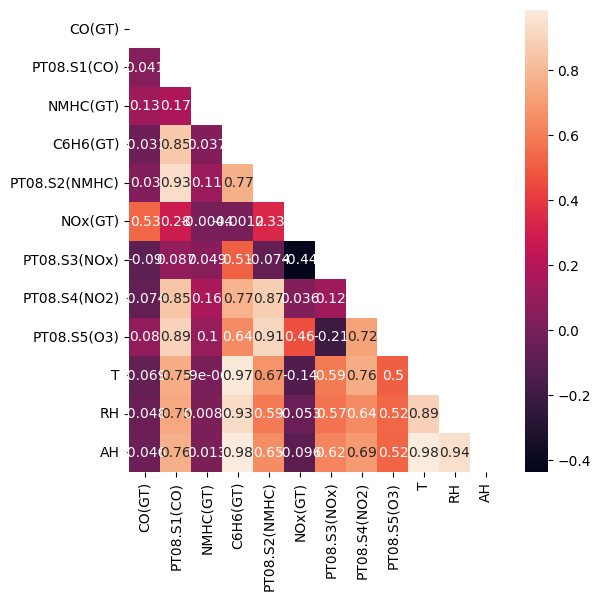

In [7]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [9]:

# from sklearn.preprocessing import LabelEncoder

# # Encode non categorical values
values = dataset.values
# encoder = LabelEncoder()
# values[:,10] = encoder.fit_transform(values[:,10])
# values = values.astype('float32')
values

array([['10-03-2004', '18:00:00', 2.6, ..., 13.6, 48.9, 0.7578],
       ['10-03-2004', '19:00:00', 2.0, ..., 13.3, 47.7, 0.7255],
       ['10-03-2004', '20:00:00', 2.2, ..., 11.9, 54.0, 0.7502],
       ...,
       ['04-04-2005', '12:00:00', 2.4, ..., 26.9, 18.3, 0.6406],
       ['04-04-2005', '13:00:00', 2.1, ..., 28.3, 13.5, 0.5139],
       ['04-04-2005', '14:00:00', 2.2, ..., 28.5, 13.1, 0.5028]],
      dtype=object)

In [12]:
dataset.drop(['Date','Time'],axis=1,inplace=True)
dataset.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,1490,1110,11.2,59.6,0.7888


In [14]:
values = dataset.values
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [15]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [16]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (9353, 1)
X (9353, 4, 12)


In [18]:
#Splitting the dataset
n_train = 1200
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (8153, 4, 12)
X_test (1200, 4, 12)
Y_train (8153, 1)
Y_test (1200, 1)


In [19]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print(X_train.shape)
print(X_test.shape)

(8153, 4, 12, 1)
(1200, 4, 12, 1)


In [20]:
#CNN+LSTM model building process
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu'), input_shape=(None, X_train.shape[2], X_train.shape[3])))

model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))

model_cnn_lstm.add(LSTM(50, activation='relu', return_sequences = True))
model_cnn_lstm.add(Dropout(0.2))

model_cnn_lstm.add(LSTM(50, activation='relu', return_sequences = True))
model_cnn_lstm.add(Dropout(0.2))

model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dropout(0.2))

model_cnn_lstm.add(Dense(50))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

In [21]:
#CNN+LSTM model
history= model_cnn_lstm.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size = 64, verbose=1)

Epoch 1/20
128/128 [==============================] - 10s 37ms/step - loss: 0.1457 - val_loss: 0.0522
Epoch 2/20
128/128 [==============================] - 3s 21ms/step - loss: 0.0410 - val_loss: 0.0432
Epoch 3/20
128/128 [==============================] - 3s 20ms/step - loss: 0.0347 - val_loss: 0.0328
Epoch 4/20
128/128 [==============================] - 3s 21ms/step - loss: 0.0316 - val_loss: 0.0304
Epoch 5/20
128/128 [==============================] - 4s 31ms/step - loss: 0.0291 - val_loss: 0.0315
Epoch 6/20
128/128 [==============================] - 3s 21ms/step - loss: 0.0281 - val_loss: 0.0284
Epoch 7/20
128/128 [==============================] - 3s 24ms/step - loss: 0.0271 - val_loss: 0.0290
Epoch 8/20
128/128 [==============================] - 4s 30ms/step - loss: 0.0268 - val_loss: 0.0278
Epoch 9/20
128/128 [==============================] - 4s 31ms/step - loss: 0.0261 - val_loss: 0.0280
Epoch 10/20
128/128 [==============================] - 3s 21ms/step - loss: 0.0259 - val_l

In [22]:
from keras.models import load_model
model_cnn_lstm.save('AirPollutionCNNLSTM.h5')

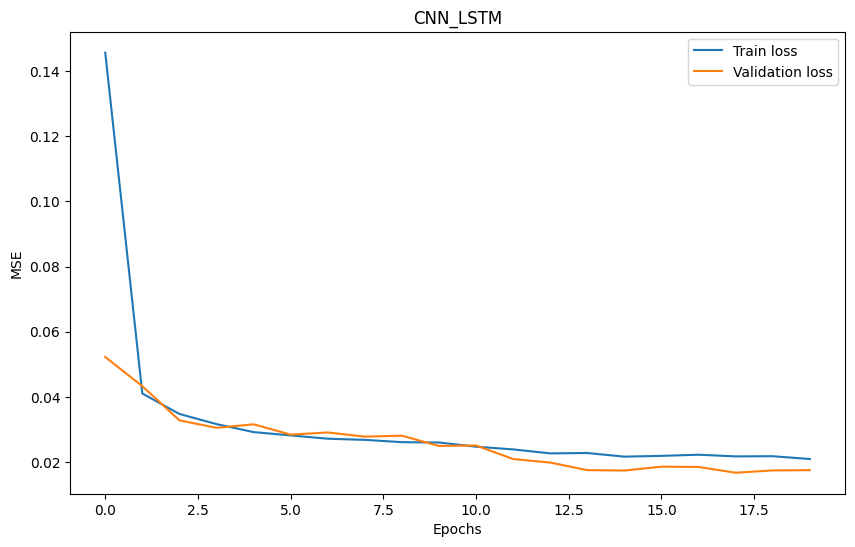

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("CNN_LSTM")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [24]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model_cnn_lstm.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 1s 10ms/step
RMSE at 40 = 46.94411721241055
RMAE at 40 = 4.570766459220941
MAPE at 40 = 5.98337589771579
R2 at 40 = -3.048568938990262
2/2 [==============================] - 0s 7ms/step
RMSE at 45 = 44.33361462148877
RMAE at 45 = 4.407251003941537
MAPE at 45 = 5.613544032405122
R2 at 45 = -3.0246675872110798
2/2 [==============================] - 0s 9ms/step
RMSE at 50 = 42.15511676329179
RMAE at 50 = 4.286585739370591
MAPE at 50 = 5.2463601509099655
R2 at 50 = -3.0081054128418856
2/2 [==============================] - 0s 8ms/step
RMSE at 55 = 43.96277925404544
RMAE at 55 = 4.425987034093371
MAPE at 55 = 5.0433593284156215
R2 at 55 = -3.139413748534177
2/2 [==============================] - 0s 8ms/step
RMSE at 60 = 42.15730121328441
RMAE at 60 = 4.307297315053761
MAPE at 60 = 5.032095907043118
R2 at 60 = -3.114881674040176
3/3 [==============================] - 0s 7ms/step
RMSE at 65 = 40.55874522083121
RMAE at 65 = 4.208393429286276
MAPE at 65 = 

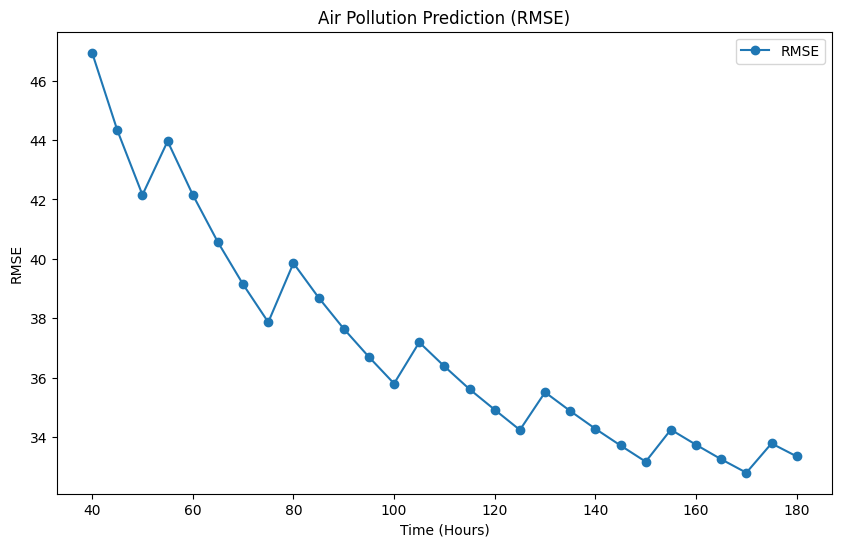

<Figure size 640x480 with 0 Axes>

In [25]:
x=[]
for i in range(40, 181, 5):
 x=np.append(x,i)
plt.figure(figsize=(10,6))  
#plt.plot(RMSE1, color= 'green',label = 'RMSE')
plt.plot(x,RMSE1,'o-', label = 'RMSE')
plt.title("Air Pollution Prediction (RMSE)")
plt.xlabel("Time (Hours)")
plt.ylabel("RMSE")
plt.legend()
plt.show()
plt.savefig('Predicted_CNNGRU_RMSE.png')
savetxt('RMSE_CNN_LSTM.csv', RMSE1, delimiter=',')

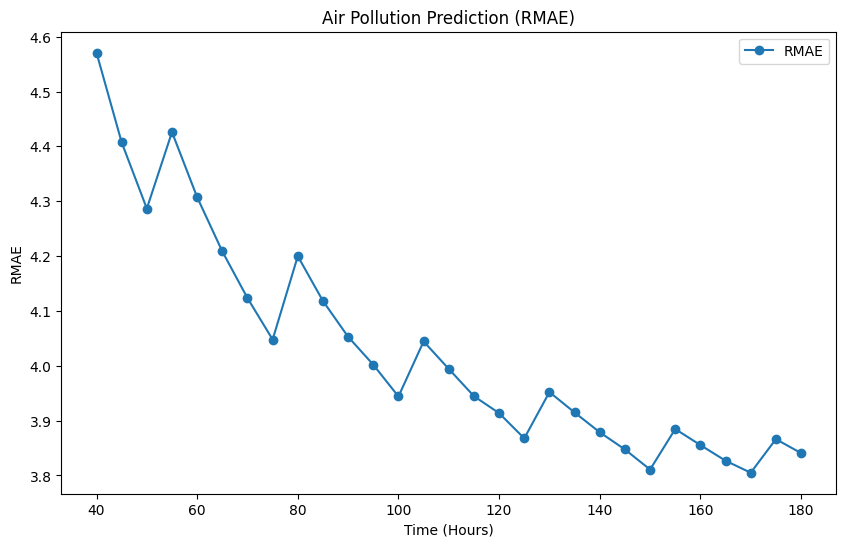

<Figure size 640x480 with 0 Axes>

In [26]:
x=[]
for i in range(40, 181, 5):
 x=np.append(x,i)
plt.figure(figsize=(10,6))  
#plt.plot(RMSE1, color= 'green',label = 'RMSE')
plt.plot(x,RMAE1, 'o-',label = 'RMAE')
plt.title("Air Pollution Prediction (RMAE)")
plt.xlabel("Time (Hours)")
plt.ylabel("RMAE")
plt.legend()
plt.show()
plt.savefig('Predicted_CNNGRU_RMSE.png')
savetxt('RMAE_CNN_LSTM.csv', RMAE1, delimiter=',')

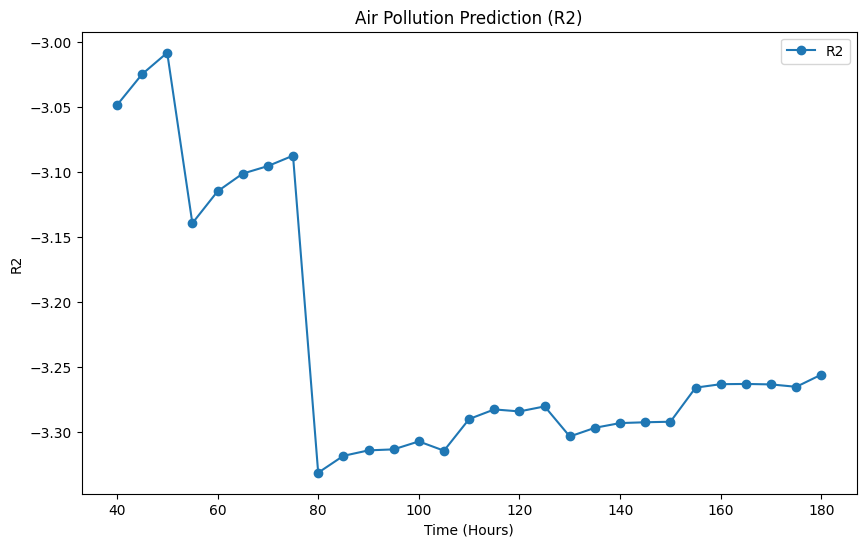

<Figure size 640x480 with 0 Axes>

In [27]:
x=[]
for i in range(40, 181, 5):
 x=np.append(x,i)
plt.figure(figsize=(10,6))  
#plt.plot(RMSE1, color= 'green',label = 'RMSE')
plt.plot(x,R22, 'o-', label='R2')
plt.title("Air Pollution Prediction (R2)")
plt.xlabel("Time (Hours)")
plt.ylabel("R2")
plt.legend()
plt.show()
plt.savefig('Predicted_CNNGRU_R2.png')
savetxt('R22_CNN_LSTM.csv', R22, delimiter=',')

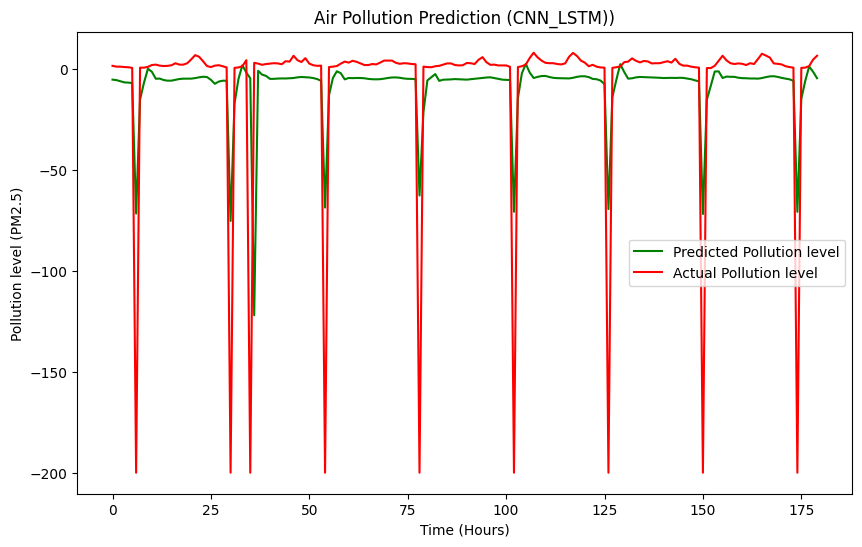

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (CNN_LSTM))")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graphCNNLSTM.png')

In [29]:
savetxt('Predict_CNN_LSTM.csv', Y_predicted, delimiter=',')

In [30]:
savetxt('Test_CNN_LSTM.csv', Y_tested, delimiter=',')